In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df.shape

(960, 64)

In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.709272,0.683640,-4.990280e-07,0.709510,0.629219,0.011738,0.694009,0.571953,0.012477,0.680424,...,0.579082,0.631175,-0.039529,0.548752,0.632263,-0.040533,0.523530,0.626444,-0.041565,Call
1,0.683126,0.723423,-5.470166e-07,0.628629,0.690743,0.001338,0.597666,0.640613,0.000756,0.582380,...,0.620680,0.593380,-0.035150,0.613483,0.618762,-0.031269,0.622480,0.635791,-0.023602,Call
2,0.665219,0.731738,-6.129805e-07,0.619747,0.709262,0.006626,0.592554,0.668817,0.008163,0.576365,...,0.613364,0.633750,-0.048503,0.593464,0.624316,-0.053571,0.581007,0.610405,-0.054049,Call
3,0.689241,0.713002,-6.030502e-07,0.670167,0.674010,0.021891,0.646406,0.634076,0.028061,0.630324,...,0.569401,0.657764,-0.038088,0.541675,0.660690,-0.039699,0.520235,0.656507,-0.041120,Call
4,0.696577,0.716865,-5.854901e-07,0.687603,0.666242,0.019846,0.669317,0.626302,0.023876,0.656472,...,0.575027,0.657372,-0.033828,0.548186,0.656643,-0.033905,0.525366,0.649547,-0.034236,Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.712142,0.725065,-9.607305e-07,0.674577,0.620784,-0.048605,0.680578,0.508995,-0.069084,0.696590,...,0.706986,0.772917,-0.088910,0.698408,0.773440,-0.087796,0.718574,0.770909,-0.083011,thumbs_up
956,0.753663,0.767797,-7.224771e-07,0.714185,0.631588,-0.026368,0.708472,0.501068,-0.045428,0.722062,...,0.713489,0.755058,-0.094815,0.723979,0.746071,-0.090806,0.758742,0.734623,-0.086114,thumbs_up
957,0.798197,0.772974,-7.313936e-07,0.751531,0.630311,-0.020565,0.743825,0.495967,-0.040469,0.756831,...,0.751083,0.752175,-0.103096,0.767158,0.743040,-0.096075,0.807989,0.729913,-0.090561,thumbs_up
958,0.817448,0.721301,-7.758333e-07,0.784645,0.596175,-0.045939,0.782225,0.468070,-0.071444,0.793437,...,0.776056,0.736036,-0.102805,0.789560,0.731375,-0.100496,0.823471,0.726308,-0.096556,thumbs_up


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (960, 63)
Labels shape = (960,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['thumbs_down', 'iloveu', 'Call', 'Super', 'Call', 'Super',
       'Show your gesture', 'peace', 'thumbs_down', 'Show your gesture',
       'Call', 'Show your gesture', 'Show your gesture',
       'Show your gesture', 'Super', 'thumbs_up', 'Show your gesture',
       'Show your gesture', 'Super', 'Super', 'thumbs_up', 'Call',
       'Super', 'Show your gesture', 'Super', 'Help', 'Good_luck',
       'Good_luck', 'House', 'peace', 'thumbs_up', 'thumbs_down',
       'thumbs_down', 'peace', 'Show your gesture', 'Show your gesture',
       'Show your gesture', 'thumbs_down', 'Show your gesture',
       'Show your gesture', 'thumbs_up', 'namaste', 'Show your gesture',
       'House', 'Super', 'namaste', 'Show your gesture',
       'Show your gesture', 'Show your gesture', 'peace',
       'Show your gesture', 'Show your gesture', 'peace', 'Help',
       'Show your gesture', 'thumbs_up', 'Super', 'Show your gesture',
       'Call', 'Show your gesture', 'Good_luck', 'thumbs_up', 'Help',
 

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.7135416666666666, 0.7135416666666666, 0.7135416666666666)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

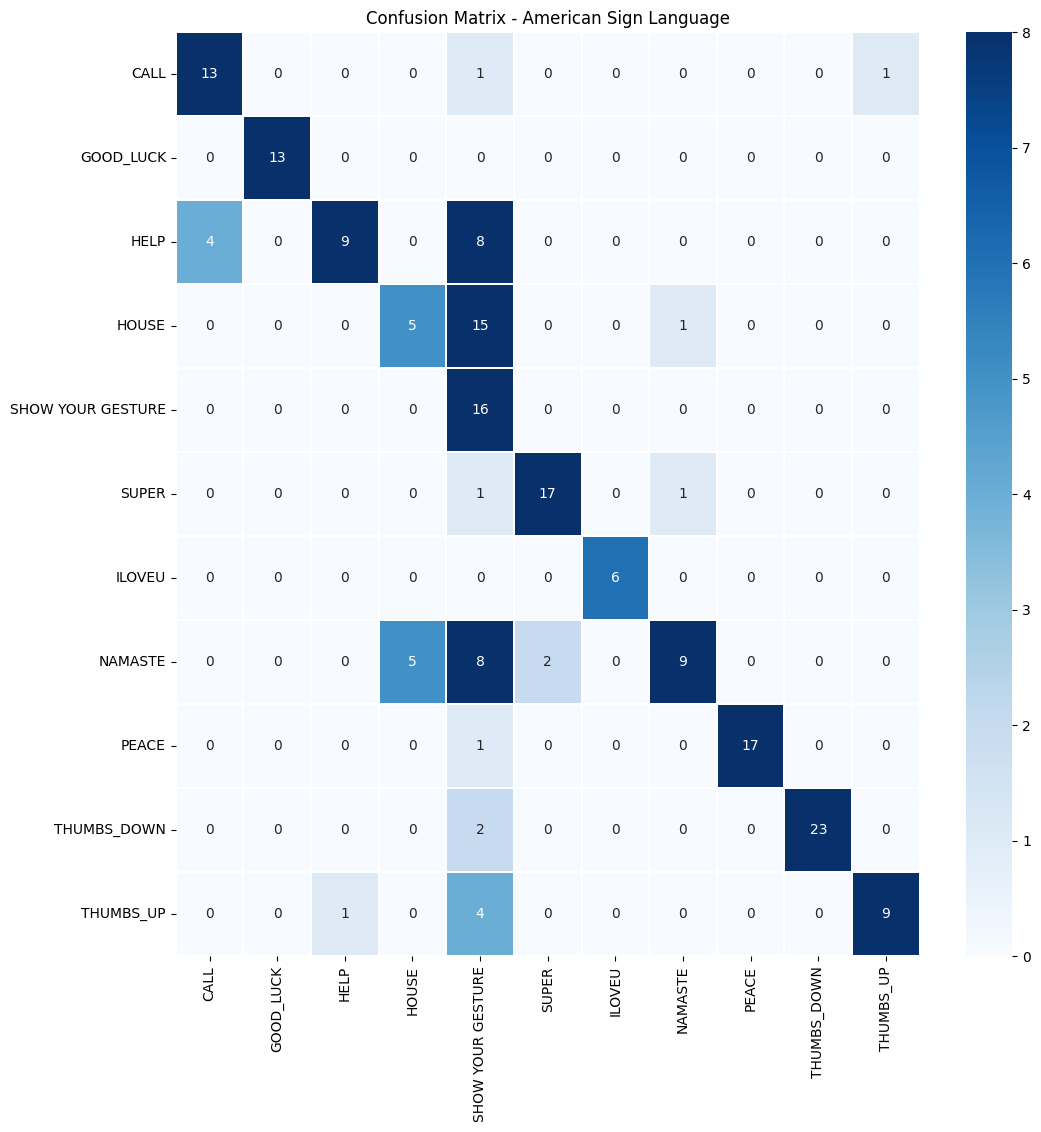

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)